In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score # used to measure accuracy

In [2]:
df = pd.read_csv("Downloads/cars_data_cleaned.csv")
df.head(10)

,name,OEM,fuel_type,Transmission,Ownership,Mileage,Engine,Max Power,Torque,Seats,kilometers_driven,price,Year
0,Kia Sonet Turbo DCT Anniversary Edition,Kia,Petrol,Automatic,First Owner,19.266996,998,118.36,172,5,20000,1150000,2022
1,Toyota Camry Hybrid,Toyota,Petrol,Automatic,First Owner,19.266996,998,118.36,172,5,70000,975000,2014
2,Hyundai i20 Asta 1.4 CRDi,Hyundai,Diesel,Automatic,First Owner,19.266996,998,118.36,172,5,120000,509999,2015
3,Volkswagen Polo 1.0 TSI Highline Plus AT,Volkswagen,Petrol,Automatic,First Owner,19.266996,998,118.36,172,5,20000,1044000,2022
4,Maruti Celerio VXI,Maruti,Petrol,Automatic,First Owner,19.266996,998,118.36,172,5,120000,400000,2015
5,Kia Seltos GTX Plus Diesel AT,Kia,Diesel,Automatic,First Owner,19.266996,998,118.36,172,5,10000,1900000,2022
6,Maruti Eeco 7 Seater Standard BSIV,Maruti,Petrol,Manual,First Owner,15.370000,1196,73.00,101,7,20687,415000,2015
7,Datsun RediGO T Option,Datsun,Petrol,Manual,First Owner,15.370000,1196,73.00,101,7,23981,266000,2017
8,Maruti Swift VXI,Maruti,Petrol,Manual,First Owner,15.370000,1196,73.00,101,7,66951,381000,2012
9,Hyundai EON Era Plus,Hyundai,Petrol,Manual,First Owner,15.370000,1196,73.00,101,7,85582,260000,2014


In [3]:
df.dtypes

name                  object
OEM                   object
fuel_type             object
Transmission          object
Ownership             object
Mileage              float64
Engine                 int64
Max Power            float64
Torque                 int64
Seats                  int64
kilometers_driven      int64
price                  int64
Year                   int64
dtype: object

In [4]:
df.shape

(8369, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8369 non-null   object 
 1   OEM                8369 non-null   object 
 2   fuel_type          8369 non-null   object 
 3   Transmission       8369 non-null   object 
 4   Ownership          8369 non-null   object 
 5   Mileage            8369 non-null   float64
 6   Engine             8369 non-null   int64  
 7   Max Power          8369 non-null   float64
 8   Torque             8369 non-null   int64  
 9   Seats              8369 non-null   int64  
 10  kilometers_driven  8369 non-null   int64  
 11  price              8369 non-null   int64  
 12  Year               8369 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 850.1+ KB


In [6]:
df.isnull().sum()

name                 0
OEM                  0
fuel_type            0
Transmission         0
Ownership            0
Mileage              0
Engine               0
Max Power            0
Torque               0
Seats                0
kilometers_driven    0
price                0
Year                 0
dtype: int64

In [7]:
print(df.fuel_type.value_counts())
print(df.Transmission.value_counts())
print(df.Ownership.value_counts())

Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: fuel_type, dtype: int64
Manual       5899
Automatic    2470
Name: Transmission, dtype: int64
First Owner     6049
Second Owner    1898
Third Owner      375
Fourth Owner      41
Fifth Owner        6
Name: Ownership, dtype: int64


In [8]:
df.drop(columns = ['Torque'],inplace = True)

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(8352, 12)

In [12]:
# encoding categorical data --- fuel type column
#label_encoder = LabelEncoder()

In [13]:
#df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
#df['Owner'] = label_encoder.fit_transform(df['Owner'])

#df.head(5)

In [14]:
# Assuming label_encoder is already initialized
#df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
#df

# EDA

<Axes: xlabel='fuel_type', ylabel='price'>

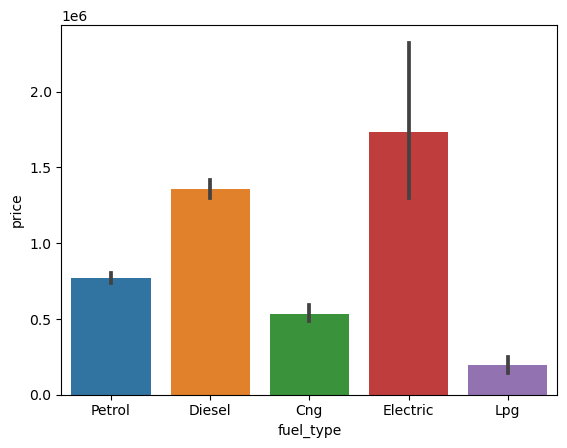

In [22]:
sns.barplot(data = df,x = "fuel_type",y = "price")

<Axes: xlabel='Transmission', ylabel='price'>

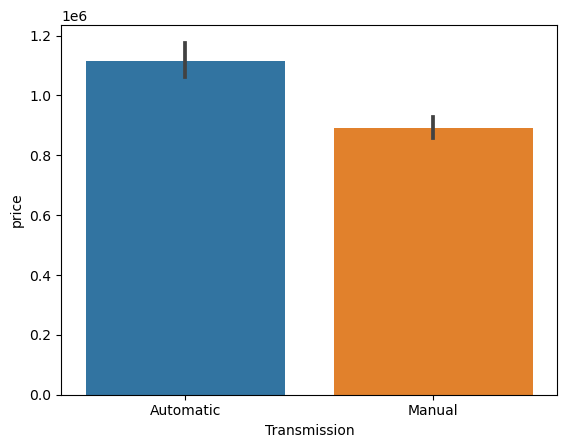

In [26]:
sns.barplot(df,x = 'Transmission', y = 'price')

<Axes: xlabel='Ownership', ylabel='price'>

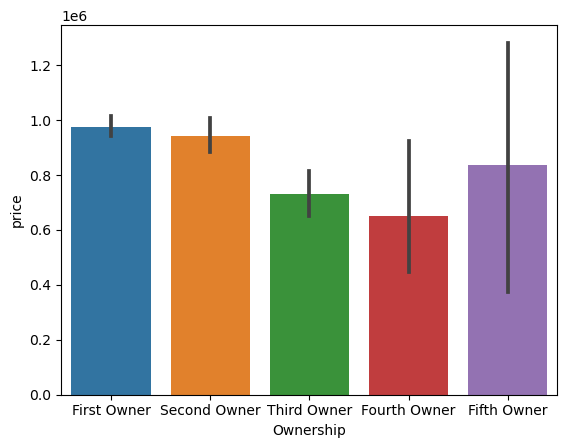

In [29]:
sns.barplot(df,x = 'Ownership',y = 'price')

<Axes: xlabel='Year', ylabel='price'>

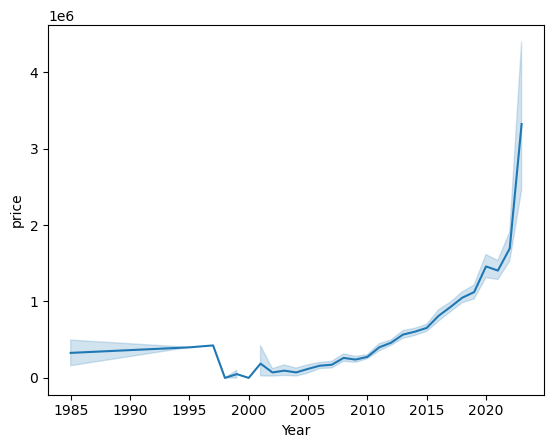

In [28]:
sns.lineplot(df,x= 'Year',y = 'price')

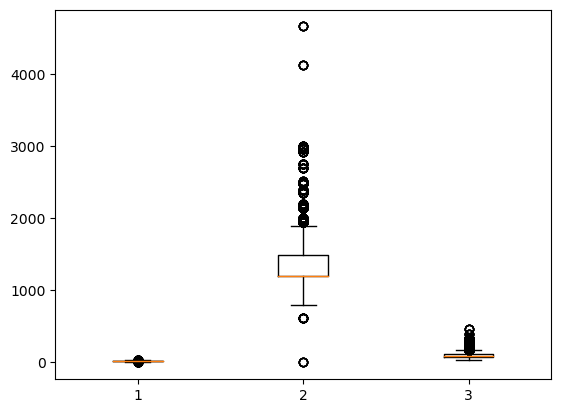

In [15]:
plt.boxplot(df[['Mileage','Engine','Max Power']])
plt.show()

In [16]:
df.shape

(8352, 12)

In [17]:
for col in df.columns:
    print("Unique values of " + col)
    print(df[col].unique())
    print("*************************************")

Unique values of name
['Kia Sonet Turbo DCT Anniversary Edition' 'Toyota Camry Hybrid'
 'Hyundai i20 Asta 1.4 CRDi' ... 'Mahindra Bolero SLX'
 'Hyundai i20 1.4 Asta Dual Tone' 'Hyundai Creta 1.6 SX Option Diesel']
*************************************
Unique values of OEM
['Kia' 'Toyota' 'Hyundai' 'Volkswagen' 'Maruti' 'Datsun' 'Ford' 'Nissan'
 'Renault' 'Tata' 'Mercedes-Benz' 'Honda' 'Audi' 'Mahindra' 'Jeep' 'Skoda'
 'BMW' 'Mini' 'MG' 'Land Rover' 'Chevrolet' 'Isuzu' 'Fiat' 'Jaguar'
 'Volvo' 'Hindustan Motors' 'Mitsubishi' 'Lexus' 'Mahindra Ssangyong'
 'Porsche' 'Citroen' 'Mahindra Renault' 'Opel']
*************************************
Unique values of fuel_type
['Petrol' 'Diesel' 'Cng' 'Electric' 'Lpg']
*************************************
Unique values of Transmission
['Automatic' 'Manual']
*************************************
Unique values of Ownership
['First Owner' 'Second Owner' 'Third Owner' 'Fourth Owner' 'Fifth Owner']
*************************************
Unique values of 

In [18]:
df.drop(columns = ['name'],inplace = True)

In [19]:
df.rename(columns = {'OEM':'Name'},inplace = True)
df

,Name,fuel_type,Transmission,Ownership,Mileage,Engine,Max Power,Seats,kilometers_driven,price,Year
0,Kia,Petrol,Automatic,First Owner,19.266996,998,118.36,5,20000,1150000,2022
1,Toyota,Petrol,Automatic,First Owner,19.266996,998,118.36,5,70000,975000,2014
2,Hyundai,Diesel,Automatic,First Owner,19.266996,998,118.36,5,120000,509999,2015
3,Volkswagen,Petrol,Automatic,First Owner,19.266996,998,118.36,5,20000,1044000,2022
4,Maruti,Petrol,Automatic,First Owner,19.266996,998,118.36,5,120000,400000,2015
...,...,...,...,...,...,...,...,...,...,...,...
8364,Kia,Petrol,Manual,First Owner,25.100000,1498,98.60,5,20000,950000,2021
8365,Toyota,Diesel,Manual,Second Owner,20.300000,1086,68.07,5,100000,1500000,2015
8366,Hyundai,Petrol,Manual,Second Owner,20.300000,1086,68.07,5,60000,418000,2011
8367,Hyundai,Diesel,Manual,First Owner,21.740000,999,67.00,5,38000,1195000,2019


In [20]:
df.to_csv("Downloads\\final_data.csv",index = False)

In [21]:
df2 = pd.read_csv("Downloads/final_data.csv")

In [22]:
df2

,Name,fuel_type,Transmission,Ownership,Mileage,Engine,Max Power,Seats,kilometers_driven,price,Year
0,Kia,Petrol,Automatic,First Owner,19.266996,998,118.36,5,20000,1150000,2022
1,Toyota,Petrol,Automatic,First Owner,19.266996,998,118.36,5,70000,975000,2014
2,Hyundai,Diesel,Automatic,First Owner,19.266996,998,118.36,5,120000,509999,2015
3,Volkswagen,Petrol,Automatic,First Owner,19.266996,998,118.36,5,20000,1044000,2022
4,Maruti,Petrol,Automatic,First Owner,19.266996,998,118.36,5,120000,400000,2015
...,...,...,...,...,...,...,...,...,...,...,...
8347,Kia,Petrol,Manual,First Owner,25.100000,1498,98.60,5,20000,950000,2021
8348,Toyota,Diesel,Manual,Second Owner,20.300000,1086,68.07,5,100000,1500000,2015
8349,Hyundai,Petrol,Manual,Second Owner,20.300000,1086,68.07,5,60000,418000,2011
8350,Hyundai,Diesel,Manual,First Owner,21.740000,999,67.00,5,38000,1195000,2019


In [23]:
label_encoder = LabelEncoder()

In [24]:
df['Name'] = label_encoder.fit_transform(df['Name'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Ownership'] = label_encoder.fit_transform(df['Ownership'])

## Building model

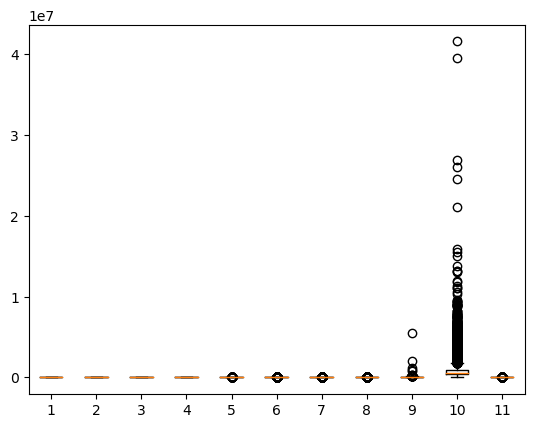

In [19]:
plt.boxplot(df)
plt.show()

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in 'price'
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the number of records before and after filtering
df.shape[0], df_no_outliers.shape[0]


(8352, 7476)

In [26]:
df_no_outliers

,Name,fuel_type,Transmission,Ownership,Mileage,Engine,Max Power,Seats,kilometers_driven,price,Year
0,13,4,0,1,19.266996,998,118.36,5,20000,1150000,2022
1,30,4,0,1,19.266996,998,118.36,5,70000,975000,2014
2,9,1,0,1,19.266996,998,118.36,5,120000,509999,2015
3,31,4,0,1,19.266996,998,118.36,5,20000,1044000,2022
4,20,4,0,1,19.266996,998,118.36,5,120000,400000,2015
...,...,...,...,...,...,...,...,...,...,...,...
8363,29,1,1,1,25.100000,1498,98.60,5,50000,850000,2019
8364,13,4,1,1,25.100000,1498,98.60,5,20000,950000,2021
8365,30,1,1,3,20.300000,1086,68.07,5,100000,1500000,2015
8366,9,4,1,3,20.300000,1086,68.07,5,60000,418000,2011


## Linear Regression

In [27]:
X = df_no_outliers.drop(columns = ['price'])
y = df_no_outliers['price']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [24]:
#model creation

model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([497953.3427912 , 157736.69503973, 722624.02828522, ...,
       772508.31347778,  91732.46831757, 701810.26614958])

In [27]:
# Evaluate model accuracy

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')



Mean Absolute Error (MAE): 206174.57618390772
Mean Squared Error (MSE): 80191844431.54395
Root Mean Squared Error (RMSE): 283181.64564735466
R-squared (R2): 0.39552683599129923


## RandomForestRegressor model

In [28]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


# Print results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 147843.63188470845
Mean Squared Error (MSE): 40489643790.09695
Root Mean Squared Error (RMSE): 201220.38611954046
R-squared (R2): 0.6947956083953372


In [35]:
param_grid = {'n_estimators': [100,200,300], 'max_depth': [None,10,20,30],
             'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],
             'max_features':['auto','sqrt','log2']}

In [37]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid,scoring = 'r2', cv = 2,n_jobs = -1)

In [39]:
grid_search.fit(X_train,y_train)

C:\Users\adith\.conda\include\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [40]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.6504328143218865


In [41]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", mse)
print("Test R-squared:", r2)

Test Mean Squared Error: 39146710784.980385
Test R-squared: 0.7049184203646701


## Feature engineering

In [32]:
#log transformation
df_no_outliers['mileage_log'] = np.log1p(df_no_outliers['Mileage'])

C:\Users\adith\AppData\Local\Temp\ipykernel_24764\2116342890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['mileage_log'] = np.log1p(df_no_outliers['Mileage'])


## XGBoost

In [43]:
!pip install xgboost

                                              0.0/124.9 MB ? eta -:--:--
                                            0.0/124.9 MB 991.0 kB/s eta 0:02:07
                                            0.1/124.9 MB 919.0 kB/s eta 0:02:16
                                            0.1/124.9 MB 819.2 kB/s eta 0:02:33
                                            0.2/124.9 MB 984.6 kB/s eta 0:02:07
                                            0.2/124.9 MB 981.9 kB/s eta 0:02:07
                                            0.3/124.9 MB 923.9 kB/s eta 0:02:15
                                            0.3/124.9 MB 896.4 kB/s eta 0:02:20
                                            0.3/124.9 MB 824.9 kB/s eta 0:02:32
                                            0.3/124.9 MB 811.9 kB/s eta 0:02:34
                                            0.4/124.9 MB 791.2 kB/s eta 0:02:38
                                            0.4/124.9 MB 823.4 kB/s eta 0:02:32
                                            0.5

In [28]:
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror',random_state = 42)

In [30]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],      # L1 regularization
    'reg_lambda': [0, 1, 10],      # L2 regularization
}

In [33]:
# Randomized searc with cross validation

random_search = RandomizedSearchCV( estimator = xgb_model, param_distributions = param_dist, scoring = 'r2',cv = 5, n_iter = 50,
                                  n_jobs = -1, random_state = 42)

# fit the random search model
random_search.fit(X_train,y_train)

print("Best Parameters:", random_search.best_params_)
print("Best R2 Score from CV:", random_search.best_score_)



Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best R2 Score from CV: 0.6902821851000278


In [34]:
# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)


#Calculate evaluation metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)


print("Test mean squared error:" , mse)
print("Test R-squared:", r2)

Test mean squared error: 38771162453.94011
Test R-squared: 0.7077492429939699


In [35]:
# save model

import pickle as pk

In [36]:
# Save the model
with open('xgboost_car_price_model.pkl', 'wb') as file:
    pk.dump(best_xgb_model, file)

# Load the model later
with open('xgboost_car_price_model.pkl', 'rb') as file:
    loaded_model = pk.load(file)


In [37]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
# Save the model
with open(r'OneDrive\Documents\car_price_app\xgboost_car_price_model.pkl','wb') as file:
    pk.dump(best_xgb_model, file)

In [40]:
# Load the model later
with open('xgboost_car_price_model.pkl', 'rb') as file:
    loaded_model = pk.load(file)

In [41]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)